<a href="https://colab.research.google.com/github/jakelaporte/MathematicalModeling/blob/master/Lsn13_SteadyStateAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamic Systems 
In this R notebook, we introduce three (four including quiver) new algorithms that need to be put in your R package. We will need these function in class. The first plots a vector field. <br>
#### vectorfield plot 
The minimum input into the vectorfield function is a vector function (fun), xlim and a ylim. You can also color and scale the vectors, decide how many will go across and down (density), and label the title/x-axis/y-axis. This function calls the quiver function that is shown above it. 

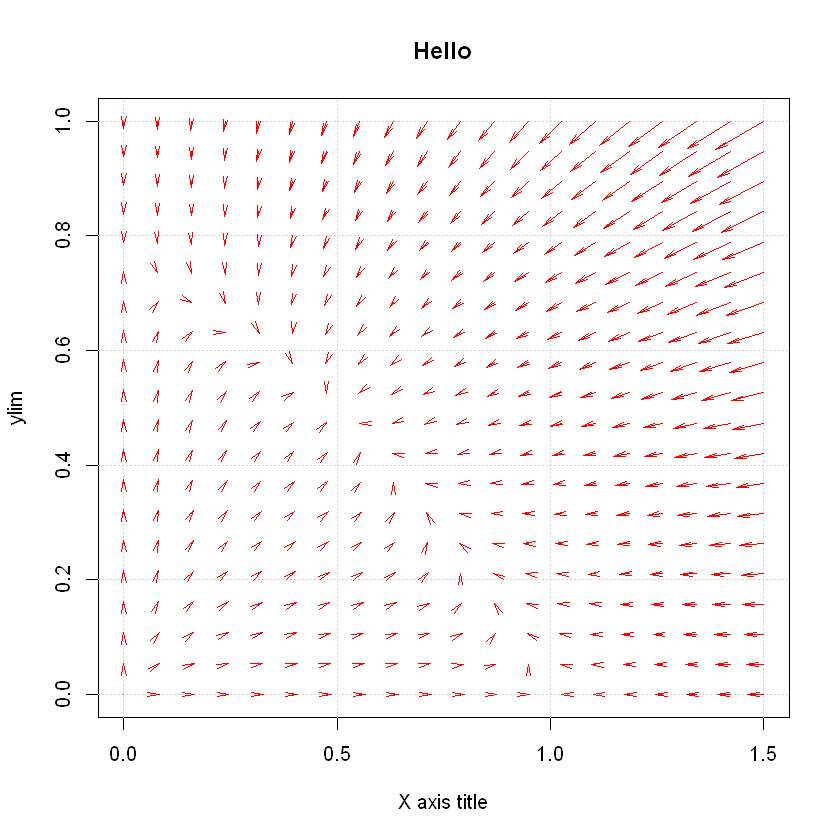

In [0]:
options(warn=-1)
library(pracma)
##########################################################################
#### Quiver  - used by vector field ######################################
##########################################################################

quiver <- function(x, y, u, v,
                   scale = 0.05, angle = 10, length = 0.1, ...) {
    stopifnot(is.numeric(x), is.numeric(y), is.numeric(u), is.numeric(v))

    arrows(x, y, x+scale*u, y+scale*v, angle=10, length=length, ...)
}

###########################################################################
##### Vector Field ####################
###########################################################################

vectorfield = function(fun, xlim, ylim, n = 16,
                        scale = 0.05, col = "darkblue",xlab = "xlim", ylab="ylim", 
                      main="",...) {
    stopifnot(is.numeric(xlim), length(xlim) == 2,
            is.numeric(ylim), length(ylim) == 2)

    xpts = linspace(xlim[1], xlim[2], n)#seq
    (xlim[1],xlim[2],length.out=n)
    ypts = linspace(ylim[1], ylim[2], n)#seq(ylim[1],ylim[2],length.out=n)

    M = meshgrid(xpts, ypts)
    x = M$X
    y = M$Y
    px=M$X
    py=M$Y
    for (i  in 1:n){
        for (j in 1:n){
            ans = fun(c(xpts[j],ypts[i]))           
            px[i,j]=ans[1]
            py[i,j]=ans[2]
        }
    }

    
    plot(xlim, ylim, type="n",xlab=xlab,ylab=ylab,main=main); grid()
    quiver(x, y, px, py, scale = scale, col = col, ...)   
    #return(list(px=px,py=py))
}
f = function(x){c(x[1]*(1-x[1]-x[2]),x[2]*(0.75-x[2]-0.5*x[1]))}
ans = vectorfield(f,xlim=c(0,1.5),ylim=c(0,1),n=20,scale=0.05,col="red",main="Hello",xlab="X axis title")

## Using the example in the book (4.2)
Using the information that is in example 4.2 and the $\alpha=1E-8$, we see that the point $(150000,400000)$ is not an equilibrium point, so we need to solve these equations simultaneously for a solution. Below is my implementation of Newton's Method for finding the roots (when the equations = 0). You will notice that depending on your starting point, they will go to one of the four equilibrium points.

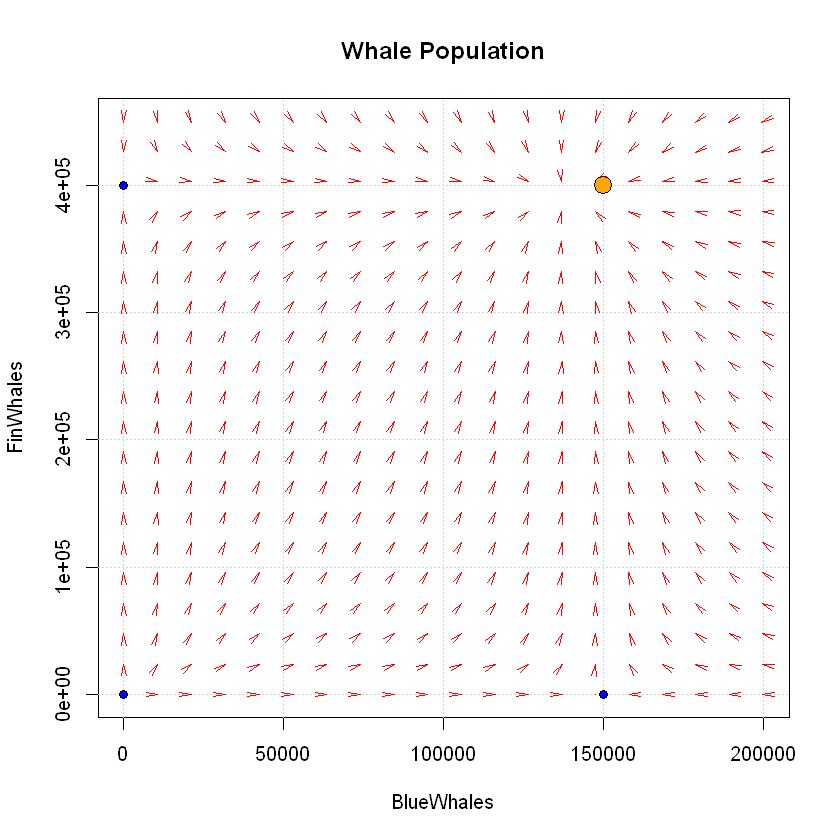

In [0]:
## Graph of the vector field and three of the four equilibrium points
f = function(x){c(0.05*x[1]*(1-x[1]/150000)-10^(-8)*x[1]*x[2],0.08*x[2]*(1-x[2]/400000)-10^(-8)*x[1]*x[2])}
ans=vectorfield(f,xlim=c(0,200000),ylim=c(0,450000),n=20,
                scale=0.15,col="red",main="Whale Population",xlab="BlueWhales",ylab="FinWhales")
points(0,0,pch=21,bg="blue")
points(0,400000,pch=21,bg="blue")
points(150000,0,pch=21,bg="blue")
points(150000,400000,,pch=21,bg="orange",cex=2)

## Newton's Method
In order to solve this, we use Newton's method. Recall that in single variable this equation is $x_{n+1}=x_{n}+\frac{f(x_0)}{f'(x_0)}$. In this case, $\vec{F}=\begin{bmatrix}f_1\\f_2\end{bmatrix}$ is a vector function, so the derivative is the Jacobian Matrix.<br><br>
$$ J = \begin{bmatrix}\partial f_1/\partial x_1&\partial f_1/\partial x_2 \\ \partial f_2/\partial x_1&\partial f_2/\partial x_2 \end{bmatrix}$$<br>
Instead of dividing, we use linear algebra to find the step by solving the system of equations for $\vec{p}$ for our step:<br><br>
$$J(\vec{x_0})\vec{p}=-\vec{F}(\vec{x_0})$$<br>
We stop when the step size $\vec{p}$ is small. See the zeros function below. It solves for the roots (seros) of a set of nonlinear equations. Since there are four roots, it depends on where you start as to which of the equilibrium points that you find.

In [0]:
Jacobian2 = function(f,x0,h=1E-4){
    jax = matrix(0,nrow=2,ncol=2)
    xph = c(x0[1]+h,x0[2]);xmh=c(x0[1]-h,x0[2])
    yph = c(x0[1],x0[2]+h);ymh=c(x0[1],x0[2]-h)
    jax[,1]=(f(xph)-f(xmh))/(2*h)
    jax[,2]=(f(yph)-f(ymh))/(2*h)            
    return(jax)
}
norm2 = function(v){sqrt(v[1]^2+v[2]^2)}
zeros = function(f,x0,h=1E-4,tol=1E-4){
    i = 1
    p=c(1,1)
    while (norm2(p)>tol & i<100){
        p = solve(Jacobian2(f,x0),-f(x0)) # linear algebra step
        x0 = x0+p
        #print(i)
        #print(x0)
        i=i+1
    }
    return(x0)
}
## Solutions for this problem ####
x0=c(150000,400000)
print(zeros(f,x0))
x0=c(150000,10)
print(zeros(f,x0))
x0=c(10,400000)
print(zeros(f,x0))

[1] 138207.3 393089.6
[1] 1.500000e+05 2.524355e-29
[1] -8.077936e-28  4.000000e+05


In [0]:
## Another function where we search for the zeros - try to find the other zeros by changing x0
f = function(x){c(x[1]*(1-x[1]-x[2]),x[2]*(0.75-x[2]-0.5*x[1]))}
x0=c(0.6,0.6)
zeros(f,x0)

[1] 0.5 0.5

## System Dynamics Path
The vector field gives you an overall idea of how the system behaves. The path below allows us to draw a path for a specific starting condition. This is an easy algorithm to understand if we remember that the function represents the change in $x_1$ and $x_2$ over time. Therefore, if we know the value of the state variables, then using those state variables in $\vec{F}$ will point us in the direction that we are going. I use a small $\Delta t$ so that we do not take too much time between steps. Newton's method will find all of the different equilibrium points depending on where we start. The path will generally only go to the closest stable or asymptotically stable equilibrium point.

In [0]:
path = function(f,x0,deltat=0.01,N=1000,tol=1E-4){
    points=matrix(0,ncol=2)
    points[1,] = x0
    n = 0
    p = c(1,1)
    while(norm2(p)>tol & n<N){
        n=n+1
        p = f(x0)*deltat
        x0=x0+p
        points = rbind(points,x0)
    }
    
    rownames(points)=0:n
    return(points)
}

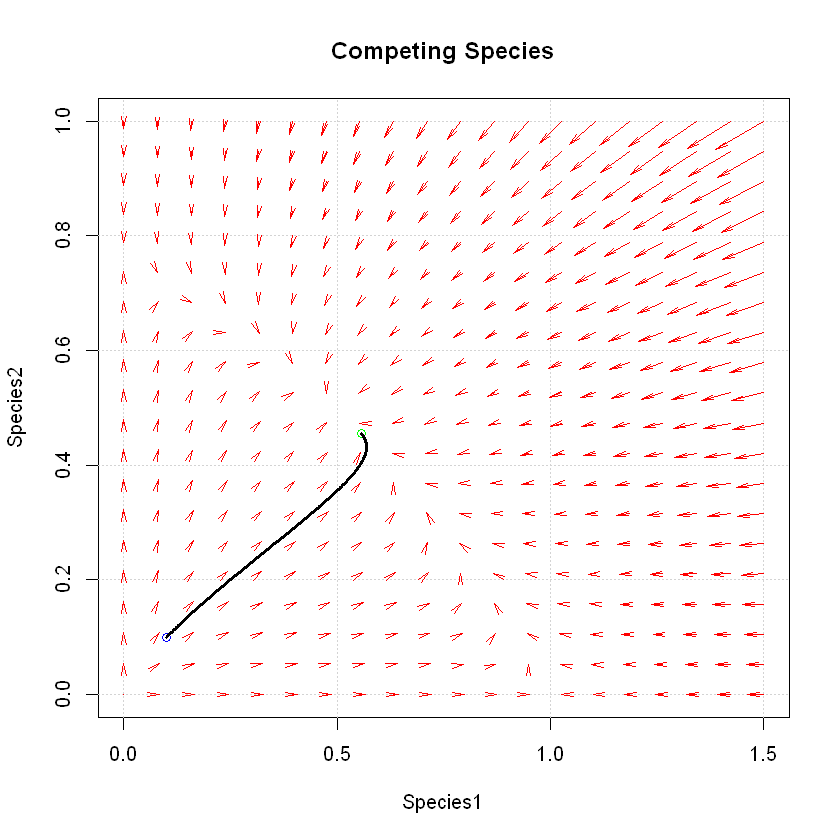

In [0]:
## Plotting the previous function and a path through the vector field
f = function(x){c(x[1]*(1-x[1]-x[2]),x[2]*(0.75-x[2]-0.5*x[1]))}
vectorfield(f,xlim=c(0,1.5),ylim=c(0,1),n=20,scale=0.05,col="red",
            main="Competing Species",xlab="Species1",ylab="Species2")
x0=c(.1,.1)
pts = path(f,x0)
points(pts[1,1],pts[1,2],col="blue")
N=length(pts[,1])
points(pts[N,1],pts[N,2],col="green")
points(pts[,1],pts[,2],type="l",lwd=3)

**Note**: Although we start very close to $(0,0)$, we still converge to the stable equilibrium point $(0.5,0.5)$. Try to get even closer and find out what happens.

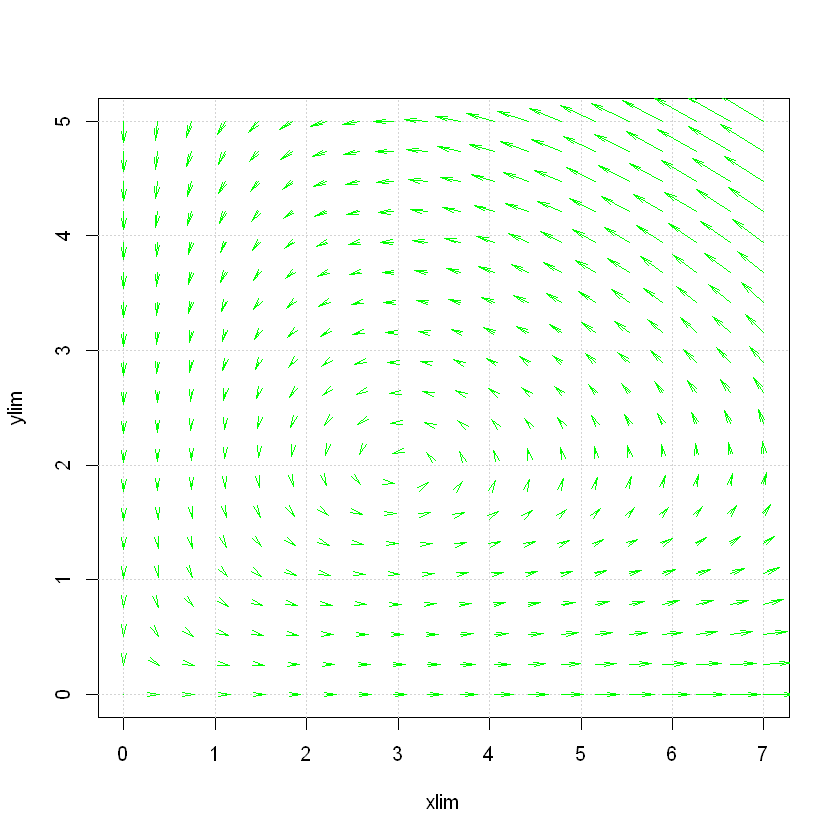

In [0]:
f = function(x){c(x[1]*(1-0.5*x[2]),x[2]*(-0.75+0.25*x[1]))}
vectorfield(f,xlim=c(0,7),ylim=c(0,5),n=20,scale=0.05,col="green")

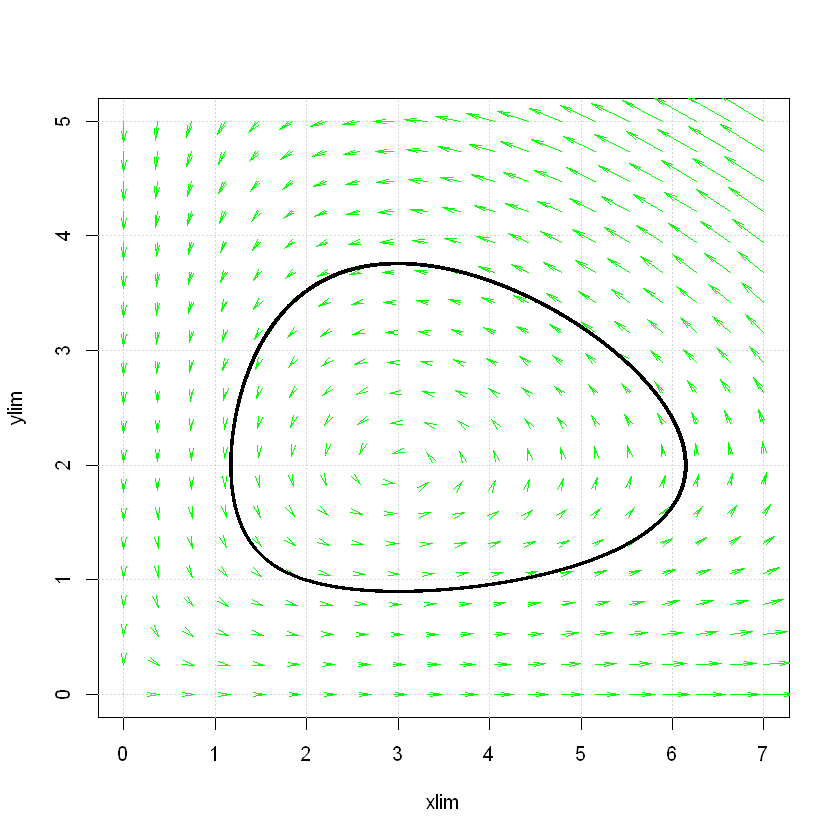

In [0]:
x0=c(2,1)
pts=path(f,x0,0.001,15000) #Note that this is smaller step sizes and more steps than before
vectorfield(f,xlim=c(0,7),ylim=c(0,5),n=20,scale=0.05,col="green")
points(pts[,1],pts[,2],type="l",lwd=3)

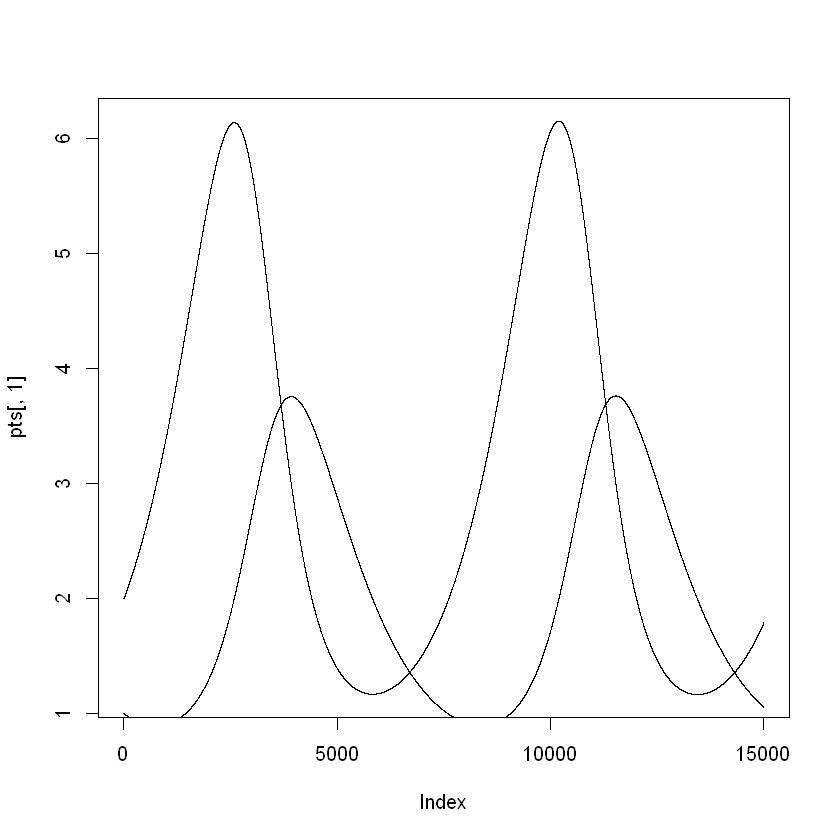

In [0]:
# Plot species 1 and species 2 over time
plot(pts[,1],type="l")
lines(pts[,2])